<a href="https://colab.research.google.com/github/bramvandeurzen934/Group16_ECG/blob/normalisation-and-feature-selection/assignment_ecg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TM10007 Assignment template -- ECG data

## Data loading and cleaning

Below are functions to load the dataset of your choice. After that, it is all up to you to create and evaluate a classification method. Beware, there may be missing values in these datasets. Good luck!

In [ ]:
# Run this to use from colab environment
!git clone https://github.com/bramvandeurzen934/Group16_ECG.git

import zipfile
import os
import pandas as pd

with zipfile.ZipFile('/content/Group16_ECG/ecg_data.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/Group16_ECG')

data = pd.read_csv('/content/Group16_ECG/ecg_data.csv', index_col=0)

labels = data['label']
feature_data = data.drop('label',axis = 1)

print(f'The number of samples: {len(data.index)}')
print(f'The number of columns: {len(data.columns)}')

Cloning into 'Group16_ECG'...
remote: Enumerating objects: 35, done.
remote: Counting objects: 100% (32/32), done.
remote: Compressing objects: 100% (29/29), done.
remote: Total 35 (delta 15), reused 12 (delta 2), pack-reused 3
Receiving objects: 100% (35/35), 64.00 MiB | 11.66 MiB/s, done.
Resolving deltas: 100% (15/15), done.
The number of samples: 827
The number of columns: 9001


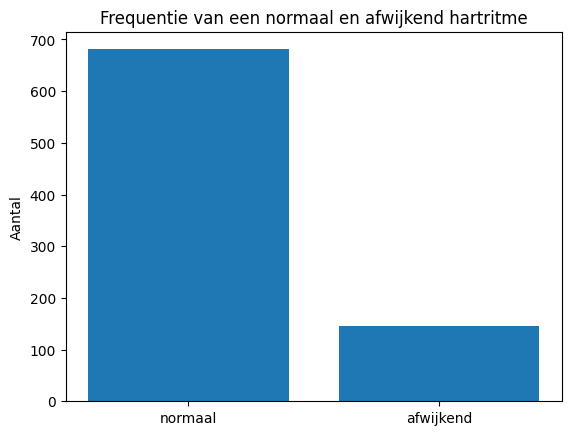

In [ ]:
# Verhoudingen van de groepen
import matplotlib.pyplot as plt
text = ['normaal','afwijkend']
lst_labels = list(labels)
frequentie = [lst_labels.count(0), lst_labels.count(1)]
plt.bar(text, frequentie)
plt.title('Frequentie van een normaal en afwijkend hartritme')
plt.ylabel('Aantal')
plt.show()

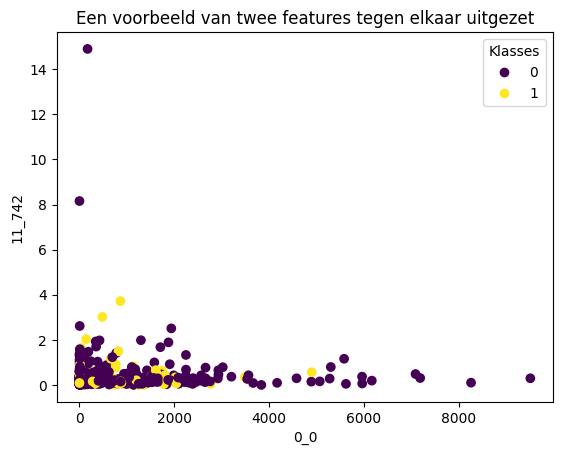

In [ ]:
# Voorbeeld van een eerste plotje
import matplotlib.pyplot as plt

feature_1 = '0_0'
feature_2 = '11_742'
scatter = plt.scatter(feature_data[feature_1],feature_data[feature_2], c = labels)
plt.title('Een voorbeeld van twee features tegen elkaar uitgezet')
plt.xlabel(feature_1)
plt.ylabel(feature_2)
legend1 = plt.legend(*scatter.legend_elements(),
                    loc="upper right", title="Klasses")
plt.show()

We kunnen een scatter maken. De waarden lopen heel erg uiteen. Scaling is dus belangrijk

In [ ]:
# Testen per feature of het normaal verdeeld is per groep
from scipy.stats import shapiro

data_gezond = data[data["label"] == 0]
data_afwijkend = data[data["label"] == 1]

data_gezond = data_gezond.drop('label',axis = 1)
data_afwijkend = data_afwijkend.drop('label',axis = 1)

niet_nrml_vd_gezond = dict()
for kolomnaam in data_gezond.columns:
  statistiek = shapiro(list(data_gezond[kolomnaam]))
  if statistiek[1] > 0.05:
    niet_nrml_vd_gezond[kolomnaam] = statistiek[1]
print(niet_nrml_vd_gezond)

niet_nrml_vd_afwijkend = dict()
for kolomnaam in data_afwijkend.columns:
  statistiek = shapiro(list(data_afwijkend[kolomnaam]))
  if statistiek[1] > 0.05:
    niet_nrml_vd_afwijkend[kolomnaam] = statistiek[1]
print(niet_nrml_vd_afwijkend)



{}
{}


conclusie: Aan de hand van een shapiro test met een p-waarde van 0.05 is gebleken dat alle features normaal verdeeld zijn.

## Soorteren op meest significant verschillend
Hieronder wordt een tweezijdige T-test gedaan voor de data. Er wordt gekeken of er een significant verschil is tussen de gezond of ongezond groep per feature. De meest significant verschillende features worden vervolgens gebruikt om een pairplot te maken

In [ ]:
from scipy.stats import ttest_ind
import numpy as np
p_values = ttest_ind(a=data_gezond, b=data_afwijkend, axis = 0, equal_var=False)

dict_p_values = dict()
for kolom in data_gezond.columns:
  p_value = ttest_ind(data_gezond[kolom],data_afwijkend[kolom],equal_var=False)
  dict_p_values[kolom] = p_value[1]

print(dict_p_values)
dict_sorted_p_values = dict(sorted(dict_p_values.items(),key = lambda x:x[1]))
print(dict_sorted_p_values)
features_sorted = list(dict_sorted_p_values.keys())
# sort_ind = np.argsort(p_values[1])
# print(sort_ind)
# print(np.array(p_values[1]))

{'0_0': 0.3191808484994553, '0_1': 0.008536605017220934, '0_2': 0.2330855486766757, '0_3': 0.12110767914208194, '0_4': 0.30056415591360425, '0_5': 0.3181238884656681, '0_6': 0.012309014361601723, '0_7': 0.9435713526910319, '0_8': 0.011178723257438185, '0_9': 2.5582683378745885e-05, '0_10': 0.006344332585518115, '0_11': 0.006777800546526922, '0_12': 0.3258649666894726, '0_13': 0.11728294682731107, '0_14': 0.42979725871752117, '0_15': 0.366320084183294, '0_16': 0.1563954161826537, '0_17': 0.1628963582888891, '0_18': 0.8755483489405962, '0_19': 0.5569574183409571, '0_20': 0.2564384262937703, '0_21': 0.1129169249202484, '0_22': 0.11265978588579344, '0_23': 0.029012348292280138, '0_24': 0.023783466759247904, '0_25': 0.19433595626020833, '0_26': 0.3299863194579882, '0_27': 0.008786859146477, '0_28': 0.023005555698947584, '0_29': 0.1167175680962618, '0_30': 0.45007500931656585, '0_31': 0.3469032166480257, '0_32': 0.26389529550032303, '0_33': 0.2803376855680222, '0_34': 0.24656030174516932, '0

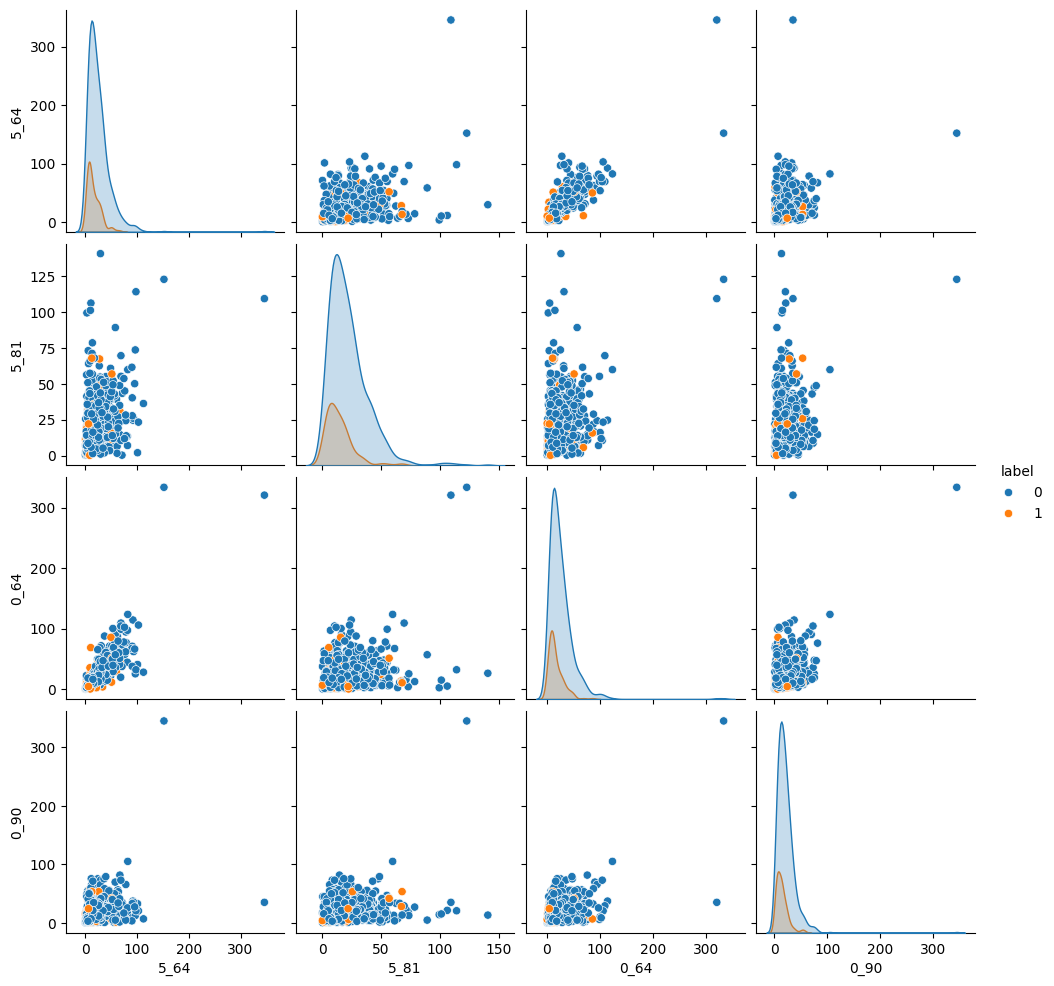

In [ ]:
import seaborn as sns
most_sign_data = data[features_sorted[:4] + ["label"]]
sns.pairplot(data = most_sign_data,hue = "label")